# Step1. Read in the parsed dataset

In [1]:
# import useful libraries for data preprocessing
import math
import numpy as np
import pandas as pd
from numpy import linalg as LA
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

Run this cell to check your current working directory. It should return the top folder "machine-learning-assisted-khovanov-homology"

In [2]:
os.getcwd()

'/Users/guoyihan/Documents/GitHub/MAT_180_ML_Projects/machine-learning-assisted-khovanov-homology/notebooks'

In [3]:
#Run this cell once if still in the notebooks folder.
#Note that running this command multiple times might get you too high in the directory tree so be 
#cautious running this cell
os.chdir("../")

In [68]:
# regression with dataset_no_repeats.csv dataset.
# change the dataset to get new report for prediction using total free part
df = pd.read_csv("data/dataset_C.csv")

In [69]:
df

,braid,components,khovanov_homology,free_part,torsion_part,free_part_count,torsion_part_count,total_num_FP_per_row,total_num_FP_per_column,jones_polynomial
0,"[2, 2, 1, -2, 2, 1, -1, -1, 2]",1,"{1: {0: Z}, 3: {0: Z, 1: 0, 2: 0, 3: 0}, 5: {0...","{(1, 0): 1, (3, 0): 1, (5, 2): 1, (9, 3): 1}","{(7, 3): {2: 1}}",4,1,"{1: 1, 3: 1, 5: 1, 9: 1}","{0: 2, 2: 1, 3: 1}","{1: 1, 3: 1, 4: -1}"
1,"[-2, -1, 1, -3, -1, 2, -3, -2, -1]",1,"{-13: {-6: 0, -5: Z, -4: 0}, -11: {-6: 0, -5: ...","{(-13, -5): 1, (-9, -4): 1, (-9, -3): 1, (-7, ...","{(-11, -4): {2: 1}, (-7, -2): {2: 1}, (-5, -1)...",8,3,"{-13: 1, -9: 2, -7: 1, -5: 1, -3: 2, -1: 1}","{-5: 1, -4: 1, -3: 1, -2: 2, -1: 1, 0: 2}","{-6: -1, -5: 1, -4: -1, -3: 2, -2: -1, -1: 1}"
2,"[-3, -2, 3, -2, -1, -1, 1, -3, -1]",3,"{-15: {-6: Z}, -13: {-6: Z, -5: 0, -4: 0, -3: ...","{(-15, -6): 1, (-13, -6): 1, (-11, -4): 2, (-9...","{(-9, -3): {2: 1}, (-5, -1): {2: 1}}",12,2,"{-15: 1, -13: 1, -11: 2, -9: 1, -7: 3, -5: 1, ...","{-6: 2, -4: 3, -3: 1, -2: 3, -1: 1, 0: 2}","{-7: 1, -5: 2, -4: -1, -3: 2, -2: -1, -1: 1}"
3,"[3, 3, 2, 3, -1, -2, 2, 3, 3]",1,"{1: {-1: 0, 0: 0}, 3: {-1: 0, 0: Z, 1: 0, 2: 0...","{(3, 0): 1, (5, 0): 1, (7, 2): 1, (11, 3): 1, ...","{(9, 3): {2: 1}, (13, 5): {2: 1}}",6,2,"{3: 1, 5: 1, 7: 1, 11: 2, 15: 1}","{0: 2, 2: 1, 3: 1, 4: 1, 5: 1}","{2: 1, 4: 1, 5: -1, 6: 1, 7: -1}"
4,"[-3, -3, 2, -2, 2, 1, -3, -3, -3]",1,"{-15: {-5: Z}, -13: {-5: 0, -4: C2}, -11: {-5:...","{(-15, -5): 1, (-11, -4): 1, (-11, -3): 1, (-7...","{(-13, -4): {2: 1}, (-9, -2): {2: 1}}",6,2,"{-15: 1, -11: 2, -7: 1, -5: 1, -3: 1}","{-5: 1, -4: 1, -3: 1, -2: 1, 0: 2}","{-7: -1, -6: 1, -5: -1, -4: 1, -2: 1}"
...,...,...,...,...,...,...,...,...,...,...
2526,"[3, 1, 3, -1, -1, -1, -1, -1, -1]",3,"{-17: {-6: 0, -5: 0}, -15: {-6: 0, -5: Z, -4: ...","{(-15, -5): 1, (-13, -5): 1, (-11, -4): 1, (-1...","{(-13, -4): {2: 1}, (-11, -4): {2: 1}, (-9, -2...",24,8,"{-15: 1, -13: 1, -11: 3, -9: 3, -7: 3, -5: 4, ...","{-5: 2, -4: 2, -3: 4, -2: 4, -1: 2, 0: 6, 2: 4}","{-7: -1, -5: -1, -3: 1, -2: 1, -1: 2, 0: 1, 1: 1}"
2527,"[2, 2, 2, -1, -2, -3, -2, -1, -3]",1,"{-11: {-6: 0, -5: Z, -4: 0}, -9: {-6: 0, -5: 0...","{(-11, -5): 1, (-7, -4): 1, (-7, -3): 1, (-5, ...","{(-9, -4): {2: 1}, (-5, -2): {2: 1}, (-3, -1):...",10,4,"{-11: 1, -7: 2, -5: 1, -3: 1, -1: 3, 1: 1, 3: 1}","{-5: 1, -4: 1, -3: 1, -2: 2, -1: 1, 0: 3, 1: 1}","{-5: -1, -4: 1, -3: -1, -2: 2, -1: -1, 0: 2, 1..."
2528,"[2, 2, -1, 3, -1, -2, -2, -1, -1]",3,"{-15: {-6: Z}, -13: {-6: 0, -5: Z x C2, -4: 0}...","{(-15, -6): 1, (-13, -5): 1, (-11, -5): 1, (-1...","{(-13, -5): {2: 1}, (-11, -4): {2: 1}, (-7, -2...",20,6,"{-15: 1, -13: 1, -11: 3, -9: 5, -7: 2, -5: 2, ...","{-6: 1, -5: 2, -4: 5, -3: 2, -2: 4, -1: 2, 0: 4}","{-7: 1, -6: -2, -5: 3, -4: -2, -3: 4, -2: -2, ..."
2529,"[2, -3, -3, 2, -3, -1, -2, -1, 2]",1,"{-13: {-6: 0, -5: 0}, -11: {-6: 0, -5: 0, -4: ...","{(-9, -3): 1, (-5, -2): 1, (-3, 0): 1, (-1, 0)...","{(-7, -2): {2: 1}}",4,1,"{-9: 1, -5: 1, -3: 1, -1: 1}","{-3: 1, -2: 1, 0: 2}","{-4: -1, -3: 1, -1: 1}"


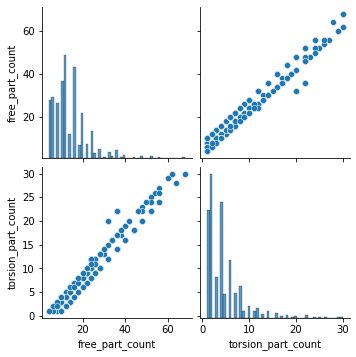

In [40]:
# look at data distribution using seaborn plot
sns.pairplot(df[['free_part_count','torsion_part_count']])

# Step2. Trian the LinearRegression Model&PolynomialRegression Model and find the parameters using the function we built ourselves

In [74]:
#Import functions built in class
from scripts.predict_accuracy import prediction, accuracy
from scripts.GDLinearReg import J, DJ, GD_linreg_improved,fit,add_poly_terms

In [75]:
X = (np.array(df.free_part_count)).reshape(-1, 1)
y = (np.array(df.torsion_part_count)).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [76]:
print(f'Size of training set: {len(X_train)}')
print(f'Size of validation set: {len(X_val)}')
print(f'Size of testing set: {len(X_test)}')

Size of training set: 1518
Size of validation set: 506
Size of testing set: 507


In [77]:
# predict with 1,2,3 components link Linear Regression
degree = 1

v, costs = fit(X_train, y_train, epsilon = 1e-10, lambda_ = 0, max_iters = 10000, poly_terms = degree)

print(f'Accuracy of training set is: {accuracy(add_poly_terms(X_train, degree),v,y_train)}')
print(f'Accuracy of validation set is: {accuracy(add_poly_terms(X_val, degree),v,y_val)}')
print(f'Accuracy of test set is: {accuracy(add_poly_terms(X_test, degree),v,y_test)}')
print(v)

Running polynomial regression of degree 1 

After 0 steps the cost is 37.69038208168644
After 9 steps the cost is 1.915558034227914

Final cost is 1.915558034227833

Accuracy of training set is: 0.11725955204216074
Accuracy of validation set is: 0.12450592885375494
Accuracy of test set is: 0.11637080867850098
[[-1.73216406]
 [ 0.45056383]]


In [78]:
# predict with 1,2,3 components Polynomial Regression
degree = 2

v, costs = fit(X_train, y_train, epsilon = 1e-10, lambda_ = 0, max_iters = 10000, poly_terms = degree)

print(f'Accuracy of training set is: {accuracy(add_poly_terms(X_train, degree),v,y_train)}')
print(f'Accuracy of validation set is: {accuracy(add_poly_terms(X_val, degree),v,y_val)}')
print(f'Accuracy of test set is: {accuracy(add_poly_terms(X_test, degree),v,y_test)}')
print(v)

Running polynomial regression of degree 2 

After 0 steps the cost is 37.69038208168644
After 1000 steps the cost is 1.7294262169070482
After 2000 steps the cost is 1.7223811562315872
After 3000 steps the cost is 1.7215426863722545
After 4000 steps the cost is 1.7214428956397885
After 5000 steps the cost is 1.721431019010098
After 6000 steps the cost is 1.721429605510707
After 6660 steps the cost is 1.7214294614185082

Final cost is 1.7214294613188657

Accuracy of training set is: 0.19696969696969696
Accuracy of validation set is: 0.16996047430830039
Accuracy of test set is: 0.17751479289940827
[[-0.7375422 ]
 [ 0.32638822]
 [ 0.0027388 ]]


In [89]:
X1 = df[df.components == 1]["free_part_count"].to_numpy().reshape(-1,1)
Y1 = df[df.components == 1]["torsion_part_count"].to_numpy().reshape(-1,1)
X2 = df[df.components == 2]["free_part_count"].to_numpy().reshape(-1,1)
Y2 = df[df.components == 2]["torsion_part_count"].to_numpy().reshape(-1,1)
X3 = df[df.components == 3]["free_part_count"].to_numpy().reshape(-1,1)
Y3 = df[df.components == 3]["torsion_part_count"].to_numpy().reshape(-1,1)

In [90]:
# predict with 1 component link
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [91]:
degree = 1

v, costs = fit(X_train, y_train, epsilon = 1e-10, lambda_ = 0, max_iters = 10000, poly_terms = degree)

print(f'Accuracy of training set is: {accuracy(add_poly_terms(X_train, degree),v,y_train)}')
print(f'Accuracy of validation set is: {accuracy(add_poly_terms(X_val, degree),v,y_val)}')
print(f'Accuracy of test set is: {accuracy(add_poly_terms(X_test, degree),v,y_test)}')
print(v)

Running polynomial regression of degree 1 

After 0 steps the cost is 34.95317220543806
After 7 steps the cost is 0.0593826548764601

Final cost is 0.059382654875744276

Accuracy of training set is: 0.9848942598187311
Accuracy of validation set is: 0.9864253393665159
Accuracy of test set is: 0.9683257918552036
[[-1.04602122]
 [ 0.50144838]]


In [97]:
# predict with 2 component link
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [98]:
degree = 1

v, costs = fit(X_train, y_train, epsilon = 1e-10, lambda_ = 0, max_iters = 10000, poly_terms = degree)

print(f'Accuracy of training set is: {accuracy(add_poly_terms(X_train, degree),v,y_train)}')
print(f'Accuracy of validation set is: {accuracy(add_poly_terms(X_val, degree),v,y_val)}')
print(f'Accuracy of test set is: {accuracy(add_poly_terms(X_test, degree),v,y_test)}')
print(v)

Running polynomial regression of degree 1 

After 0 steps the cost is 27.086956521739136
After 10 steps the cost is 0.04298997741997323

Final cost is 0.042989977418824106

Accuracy of training set is: 0.9891304347826086
Accuracy of validation set is: 0.9838709677419355
Accuracy of test set is: 0.9838709677419355
[[-2.0278167 ]
 [ 0.50053558]]


In [99]:
# predict with 3 component link
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [103]:
degree = 1

v, costs = fit(X_train, y_train, epsilon = 1e-10, lambda_ = 0, max_iters = 10000, poly_terms = degree)

print(f'Accuracy of training set is: {accuracy(add_poly_terms(X_train, degree),v,y_train)}')
print(f'Accuracy of validation set is: {accuracy(add_poly_terms(X_val, degree),v,y_val)}')
print(f'Accuracy of test set is: {accuracy(add_poly_terms(X_test, degree),v,y_test)}')
print(v)

Running polynomial regression of degree 1 

After 0 steps the cost is 38.46795827123695
After 12 steps the cost is 0.4742676222943943

Final cost is 0.47426762229265484

Accuracy of training set is: 0.9597615499254843
Accuracy of validation set is: 0.9508928571428571
Accuracy of test set is: 0.9508928571428571
[[-4.24670737]
 [ 0.51874705]]


In [12]:
# we need to test with the dataset that has 2_component link or 3-componet link.
# also a dataset combined them together

# Step3. Train the LinearRegression model from Scikit-Learn

In [16]:
# try to make prediction using LinearRegression and libraries from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

# need to reshape X because there is only one feature in X (i.e. X is currently a row vector, need to convert it to a column vector)
X = (np.array(df.free_part_count)).reshape(-1, 1)
y = (np.array(df.torsion_part_count))

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [17]:
# import libraries for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# function to compute accuracy
def find_accuracy(y_pred, y_true):
    accur_count = 0
    for index,y in enumerate(y_pred):
        if y == math.ceil(y_true[index]):
            accur_count += 1
    return accur_count/len(y_true)

In [19]:
# Find the degree of Polynomial Regression that gives the best prediction accuracy
model_degrees_and_scores = {}
model_degrees_and_accuracy = {}
for current_degree in range(1,15):
    polynomial_features= PolynomialFeatures(degree=current_degree)
    X_poly_train_deg = polynomial_features.fit_transform(X_train)
    print(f'Polynomial Features: [1,x,x**2,...,x**{current_degree}]')
    print(X_poly_train_deg[0])
    
    X_poly_val_deg = polynomial_features.fit_transform(X_val)
    print(f'Polynomial Features: [1,x,x**2,...,x**{current_degree}]')
    print(X_poly_val_deg[0])
    

    X_poly_test_deg = polynomial_features.fit_transform(X_test)
    print(f'Polynomial Features: [1,x,x**2,...,x**{current_degree}]')
    print(X_poly_test_deg[0])

    polyreg = LinearRegression().fit(X_poly_train_deg, y_train)
    
    train_score = polyreg.score(X_poly_train_deg,y_train)
    val_score = polyreg.score(X_poly_val_deg,y_val)
    test_score = polyreg.score(X_poly_test_deg,y_test)
        
    y_train_pred = polyreg.predict(X_poly_train_deg)
    y_val_pred = polyreg.predict(X_poly_val_deg)
    y_test_pred = polyreg.predict(X_poly_test_deg)
    train_accuracy = find_accuracy(y_train, y_train_pred)
    val_accuracy = find_accuracy(y_val, y_val_pred)
    test_accuracy = find_accuracy(y_test, y_test_pred)
    
    model_degrees_and_scores[current_degree] = (train_score, val_score, test_score)
    model_degrees_and_accuracy[current_degree] = (train_accuracy, val_accuracy, test_accuracy)

Polynomial Features: [1,x,x**2,...,x**1]
[ 1. 10.]
Polynomial Features: [1,x,x**2,...,x**1]
[1. 4.]
Polynomial Features: [1,x,x**2,...,x**1]
[ 1. 14.]
Polynomial Features: [1,x,x**2,...,x**2]
[  1.  10. 100.]
Polynomial Features: [1,x,x**2,...,x**2]
[ 1.  4. 16.]
Polynomial Features: [1,x,x**2,...,x**2]
[  1.  14. 196.]
Polynomial Features: [1,x,x**2,...,x**3]
[   1.   10.  100. 1000.]
Polynomial Features: [1,x,x**2,...,x**3]
[ 1.  4. 16. 64.]
Polynomial Features: [1,x,x**2,...,x**3]
[1.000e+00 1.400e+01 1.960e+02 2.744e+03]
Polynomial Features: [1,x,x**2,...,x**4]
[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]
Polynomial Features: [1,x,x**2,...,x**4]
[  1.   4.  16.  64. 256.]
Polynomial Features: [1,x,x**2,...,x**4]
[1.0000e+00 1.4000e+01 1.9600e+02 2.7440e+03 3.8416e+04]
Polynomial Features: [1,x,x**2,...,x**5]
[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]
Polynomial Features: [1,x,x**2,...,x**5]
[1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]
Polynomial Features: [1,x,x**2,...,x*

In [20]:
for i, scores in model_degrees_and_scores.items():
    print(f'Degree {i} scores: {scores}')

Degree 1 scores: (0.9961854542032902, 0.996689906167883, 0.9986253583557888)
Degree 2 scores: (0.9961855431112161, 0.9966895074290567, 0.9986249143257563)
Degree 3 scores: (0.9961932965785659, 0.9966981368106852, 0.9986212759008535)
Degree 4 scores: (0.996219219700024, 0.9967179279103181, 0.998606321386437)
Degree 5 scores: (0.9962596431360705, 0.9967519307061131, 0.998581222802471)
Degree 6 scores: (0.9962954369649488, 0.996767244909191, 0.998557268965047)
Degree 7 scores: (0.9963098365320182, 0.9967699981628567, 0.9985500241346432)
Degree 8 scores: (0.9963105464454888, 0.9967680059963694, 0.9985490659396984)
Degree 9 scores: (0.9963072188838022, 0.9967600761688417, 0.9985332524282866)
Degree 10 scores: (0.9914089185049131, 0.9905652177069153, 0.9915613731545233)
Degree 11 scores: (0.9768961727036134, 0.9755531682353894, 0.9735762151174491)
Degree 12 scores: (0.9509284710094854, 0.948162826290044, 0.9365058987896278)
Degree 13 scores: (0.9122816148839594, 0.9053223194910859, 0.8848826

In [21]:
for i, accuracy in model_degrees_and_accuracy.items():
    print(f'Degree {i} scores: {accuracy}')

Degree 1 scores: (0.9567901234567902, 0.9537037037037037, 0.9631336405529954)
Degree 2 scores: (0.9567901234567902, 0.9537037037037037, 0.9631336405529954)
Degree 3 scores: (0.9290123456790124, 0.9166666666666666, 0.9447004608294931)
Degree 4 scores: (0.8981481481481481, 0.9120370370370371, 0.8940092165898618)
Degree 5 scores: (0.8472222222222222, 0.875, 0.8663594470046083)
Degree 6 scores: (0.5817901234567902, 0.5925925925925926, 0.6129032258064516)
Degree 7 scores: (0.5987654320987654, 0.5879629629629629, 0.6267281105990783)
Degree 8 scores: (0.5416666666666666, 0.5277777777777778, 0.5391705069124424)
Degree 9 scores: (0.5555555555555556, 0.5138888888888888, 0.5483870967741935)
Degree 10 scores: (0.558641975308642, 0.5092592592592593, 0.543778801843318)
Degree 11 scores: (0.5740740740740741, 0.5787037037037037, 0.6036866359447005)
Degree 12 scores: (0.24228395061728394, 0.25, 0.2764976958525346)
Degree 13 scores: (0.14351851851851852, 0.12037037037037036, 0.1889400921658986)
Degree 1